# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
file = "/home/putra/Documents/Ds Course/S36_L247/Bank-data.csv"

In [8]:
raw_data = pd.read_csv(file)
dataset = raw_data.copy()
dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset['y'] = dataset['y'].map({'yes':1, 'no':0})
dataset.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [9]:
dataset.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [11]:
x1 = dataset['duration']
y = dataset['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [12]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
results = log_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


/home/putra/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.2121
Time:                        11:04:30   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'Subscribtion')

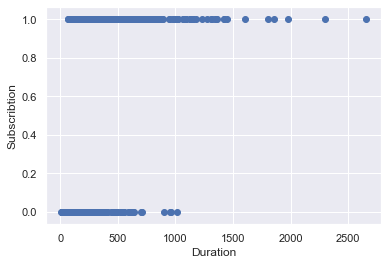

In [13]:
plt.scatter(x1,y)
plt.xlabel('Duration')
plt.ylabel('Subscribtion')

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [17]:
x1 = dataset[['interest_rate', 'credit', 'march', 'may', 'previous', 'duration']]
y = dataset['y']

In [19]:
x = sm.add_constant(x1)
log_reg2 = sm.Logit(y,x)
results_log = log_reg2.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.5153
Time:                        11:12:32   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [21]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [23]:
confusion_matrix(x, y, results_log)

(array([[220.,  39.],
        [ 31., 228.]]), 0.8648648648648649)

great, the accuracy is 84%